In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/training',
    validation_split=0.1,  
    subset="training",     
    seed=42,               
    image_size=(224, 224), 
    batch_size=32          
)


Found 8005 files belonging to 2 classes.
Using 7205 files for training.


In [5]:
valid_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/training',
    validation_split=0.1,  
    subset="validation",   
    seed=42,               
    image_size=(224, 224), 
    batch_size=32          
)


Found 8005 files belonging to 2 classes.
Using 800 files for validation.


In [21]:
data_iterator = train_data.as_numpy_iterator()
images, labels = data_iterator.next()


In [16]:
def normalizer(image, label):
    aux = tf.cast(image, dtype=tf.float32)
    image_norm = aux/255.0
    return image_norm, label

train = train_data.map(normalizer)
valid = valid_data.map(normalizer) 
    

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


In [29]:
#model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'],
)

In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,779,121 (10.60 MB)

 Trainable params: 2,779,121 (10.60 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
hist = model.fit(
    train,
    batch_size=32, 
    epochs=20, 
    validation_data=valid
)


Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 103s 433ms/step - accuracy: 0.5269 - loss: 0.7126 - val_accuracy: 0.6313 - val_loss: 0.6541
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 79s 347ms/step - accuracy: 0.6288 - loss: 0.6440 - val_accuracy: 0.6687 - val_loss: 0.6240
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 74s 326ms/step - accuracy: 0.7066 - loss: 0.5697 - val_accuracy: 0.6825 - val_loss: 0.5894
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 81s 355ms/step - accuracy: 0.7935 - loss: 0.4416 - val_accuracy: 0.7337 - val_loss: 0.5762
Epoch 5/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 85s 373ms/step - accuracy: 0.8754 - loss: 0.2834 - val_accuracy: 0.7538 - val_loss: 0.7026
Epoch 6/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 72s 318ms/step - accuracy: 0.9495 - loss: 0.1382 - val_accuracy: 0.7337 - val_loss: 0.9351
Epoch 7/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 71s 313ms/step - accuracy: 0.9676 - loss: 0.0913 - val_accuracy: 0.7462 - val_loss: 1.2317
Epoch 8/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 72s 319ms/step - accuracy: 0.9791 - loss: 

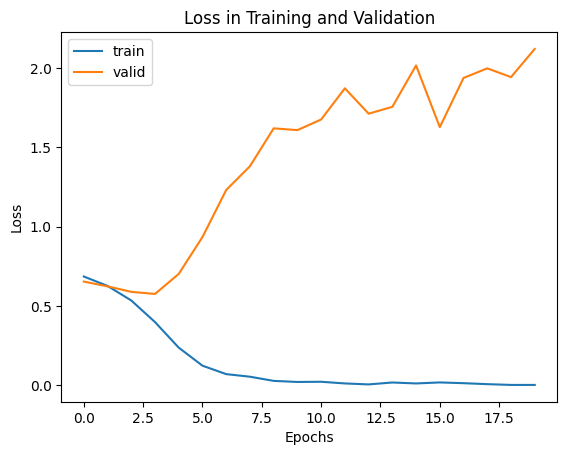

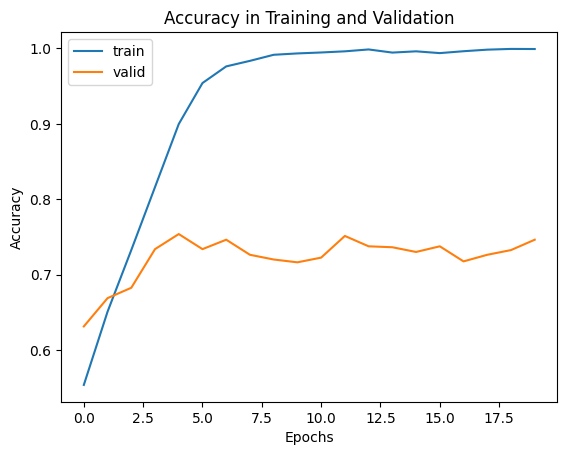

In [34]:
import matplotlib.pyplot as plt


plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='valid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss in Training and Validation')
plt.show()


if 'accuracy' in hist.history:  # Verifica se foi usada a métrica R²
    plt.plot(hist.history['accuracy'], label='train')
    plt.plot(hist.history['val_accuracy'], label='valid')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy in Training and Validation')
    plt.show()